## This notebook plots the depth distribution for plateau events

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Catalog from VELEST
df1=pd.read_csv("/Users/sankha/Desktop/research/Spuna_plateau/velest/output/catalog_velest_puna_crust_v5.txt", sep="\s+", header=None)
print(df1)

      0   1   2   3   4      5        6        7      8     9    10    11
0      8   1   1   0  48  10.18 -26.5914 -67.2805  13.64     1  124  0.28
1      8   1   1   9   3   3.01 -26.7383 -66.1851  24.23     2  150  0.23
2      8   1   3   5  36  11.42 -25.9514 -66.7780  -0.83     5  170  0.14
3      8   1   3  21  36  20.53 -26.4465 -66.4141   3.28     6  162  0.32
4      8   1   4   6   2  46.76 -25.8471 -67.3258   7.00     7  168  0.22
...   ..  ..  ..  ..  ..    ...      ...      ...    ...   ...  ...   ...
2639   9   9  25  18  17   9.34 -25.8678 -67.7674  14.70  3082  157  0.94
2640   9   9  26   6  31  16.97 -27.3956 -66.6651   7.30  3083   93  0.22
2641   9   9  28  17  57   3.75 -27.3156 -66.5992   2.90  3084   68  0.51
2642   9   9  29   0  29  20.29 -26.6560 -66.2623  15.56  3085   61  0.27
2643   9   9  29  12  38  38.21 -26.3628 -66.6946   0.29  3086   62  0.26

[2644 rows x 12 columns]


In [4]:
#Elevation information extracted from ETOPO1 digital elevation model file
df2=pd.read_csv("/Users/sankha/Desktop/research/Spuna_plateau/paper_figures/grdfiles/ETOPO_SAM.xyz", sep="\s+", header=None)
print(df2)

                 0     1     2
0       -90.000000   0.0  -877
1       -89.983333   0.0  -918
2       -89.966667   0.0  -955
3       -89.950000   0.0  -985
4       -89.933333   0.0 -1015
...            ...   ...   ...
7205396 -50.066667 -50.0 -2669
7205397 -50.050000 -50.0 -2702
7205398 -50.033333 -50.0 -2734
7205399 -50.016667 -50.0 -2764
7205400 -50.000000 -50.0 -2787

[7205401 rows x 3 columns]


In [5]:
#Extracting the elevations at the event locations
fo=open("catalog_velest_puna_elev_v5.txt",'w')
for i in range(len(df1[0])):
    idx1=np.where(abs(df2[0]-df1[7][i])<0.05)
    idx2=np.where(abs(df2[1]-df1[6][i])<0.05)
    idx = np.intersect1d(idx1, idx2)
    elev=df2[2][idx]
    #print(elev)
    elevation=(np.mean(elev))
    print(df1[6][i],df1[7][i],df1[8][i],elevation,file=fo)
        

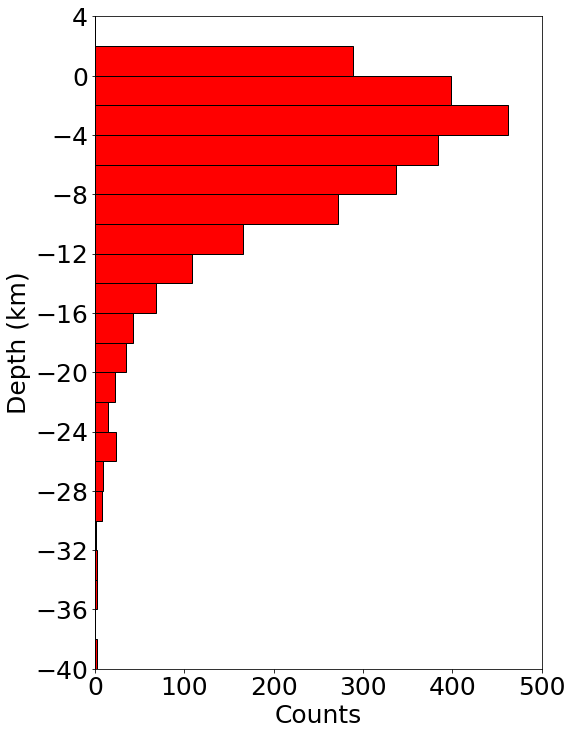

In [7]:
#Depth distribution plot for the entire catalog
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(8,12))
binns=np.arange(-40,8,2)
plt.hist(-df1[8], bins=binns,orientation="horizontal", edgecolor="black", color="red")
plt.xticks(np.arange(0,600,100));
plt.yticks(np.arange(-40,8,4));
plt.xlim([0,500])
plt.ylim([-40,4])
plt.rcParams.update({'font.size': 30})
plt.xlabel("Counts")
plt.ylabel("Depth (km)")
plt.savefig("depth_velest.jpg", dpi=300, bbox_inches="tight")

In [8]:
%%sh
##Extract the events on the plateau: Elevation>3000 m
awk '{ if ($4>3000 && $2<-66.3 && $2>-68.5 && $1>-27.0 ) print $2,$1,$3,$4/1000}' catalog_velest_puna_elev_v5.txt>catalog_velest_plateau.txt

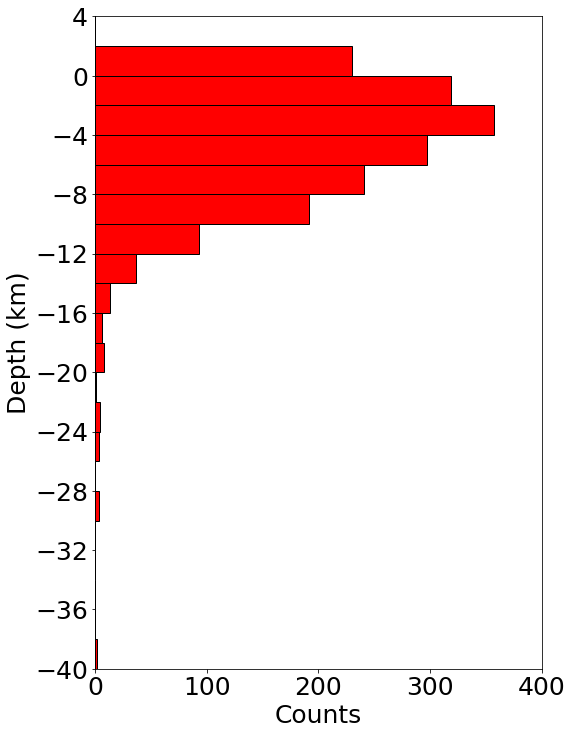

In [9]:
#Plot depth distribution for plateau events:

df3=pd.read_csv("catalog_velest_plateau.txt", sep='\s+', header=None)
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(8,12))
binns=np.arange(-40,8,2)
plt.hist(-df3[2], bins=binns,orientation="horizontal", edgecolor="black", color="red")
plt.xticks(np.arange(0,600,100));
plt.yticks(np.arange(-40,8,4));
plt.xlim([0,400])
plt.ylim([-40,4])
plt.rcParams.update({'font.size': 30})
plt.xlabel("Counts")
plt.ylabel("Depth (km)")
plt.savefig("depth_plateau.jpg", dpi=300, bbox_inches="tight")

In [4]:
df4=pd.read_csv("mulcahy_2014.csv")
print(df3)

     Year  MM  DD  HH  MM.1   Sec  Latitude  Longitude  Depth  stations  RMS  \
0    2008   3   4  12     6  14.8   -25.884    -67.256   11.8        21  0.6   
1    2008   3   4  12    24  48.7   -25.852    -67.224    0.0        32  0.7   
2    2008   3   4  13     3  13.9   -25.923    -67.265    8.2        35  0.8   
3    2008   3   5   2    45  16.7   -26.974    -67.264    0.0        21  0.5   
4    2008   3   5   8    54  34.7   -26.767    -68.126    4.4        22  0.6   
..    ...  ..  ..  ..   ...   ...       ...        ...    ...       ...  ...   
496  2009   9  10  15     9  58.3   -26.570    -68.070   11.1        16  0.6   
497  2009   9  11   2    13  57.2   -26.122    -67.811   12.0        37  0.8   
498  2009   9  11   5     0  47.8   -28.165    -66.602  155.7        34  0.4   
499  2009   9  11  22    33   1.2   -27.195    -67.458   12.0        20  0.8   
500  2009   9  20   2    42  30.6   -27.019    -65.987    0.0        18  1.4   

     Mc  AzGap  TimeErr  LatErr  LonErr

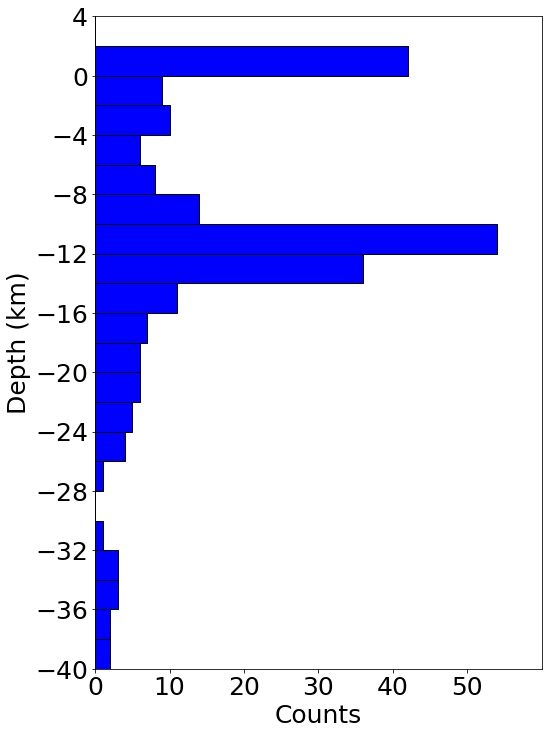

In [17]:
#Plot depth distribution for plateau events:
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(8,12))
binns=np.arange(-40,8,2)
plt.hist(-df4["Depth"], bins=binns,orientation="horizontal", edgecolor="black", color="blue")
plt.xticks(np.arange(0,60,10));
plt.yticks(np.arange(-40,8,4));
plt.xlim([0,60])
plt.ylim([-40,4])
plt.rcParams.update({'font.size': 30})
plt.xlabel("Counts")
plt.ylabel("Depth (km)")
plt.savefig("depth_mulcahy.jpg", dpi=300, bbox_inches="tight")